In [53]:
import yfinance as yf
import numpy as np
import pandas as pd 
from datetime import datetime
import matplotlib.pyplot as plt
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA

In [54]:
# Đọc dữ liệu từ file CSV
data = pd.read_csv('KDH-Historical-Data.csv')

In [55]:
data = data[::-1].reset_index(drop=True)
data['Price'] = data['Price'].str.replace(',', '').astype(float)

In [56]:
data['Time'] = np.arange(len(data.index))

In [57]:
data

,Date,Price,Open,High,Low,Vol.,Change %,Time
0,01/03/2017,9198.4,"9,129.3","9,221.5","9,129.3",226.39K,-0.25%,0
1,01/04/2017,9198.4,"9,198.4","9,221.5","9,198.4",172.08K,0.00%,1
2,01/05/2017,8944.8,"9,198.4","9,198.4","8,898.7",500.75K,-2.76%,2
3,01/06/2017,9083.2,"8,990.9","9,129.3","8,898.7",203.25K,1.55%,3
4,01/09/2017,9083.2,"9,037.0","9,175.4","9,014.0",278.61K,0.00%,4
...,...,...,...,...,...,...,...,...
1795,03/14/2024,37500.0,"37,600.0","37,950.0","37,300.0",4.58M,-0.27%,1795
1796,03/15/2024,37200.0,"37,400.0","38,350.0","37,050.0",4.15M,-0.80%,1796
1797,03/18/2024,37200.0,"37,300.0","37,950.0","34,600.0",9.11M,0.00%,1797
1798,03/19/2024,36600.0,"37,450.0","37,500.0","36,450.0",2.64M,-1.61%,1798


In [58]:
# Lấy dữ liệu cần phân tích
time_series_price = data['Price']

# Phân chia dữ liệu thành tập huấn luyện và tập kiểm tra(7:3)
train_data_price_73 = time_series_price[:int(0.7*len(time_series_price))]
test_data_price_73 = time_series_price[int(0.7*len(time_series_price)):]

# Phân chia dữ liệu thành tập huấn luyện và tập kiểm tra(8:2)
train_data_price_82 = time_series_price[:int(0.8*len(time_series_price))]
test_data_price_82 = time_series_price[int(0.8*len(time_series_price)):]

# Phân chia dữ liệu thành tập huấn luyện và tập kiểm tra(9:1)
train_data_price_91 = time_series_price[:int(0.9*len(time_series_price))]
test_data_price_91 = time_series_price[int(0.9*len(time_series_price)):]

In [59]:
auto_arima(train_data_price_73, maxiter=100)

ARIMA(maxiter=100, order=(2, 1, 2), scoring_args={}, suppress_warnings=True)

In [60]:
auto_arima(train_data_price_82, maxiter=100)

ARIMA(maxiter=100, order=(1, 1, 4), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [61]:
auto_arima(train_data_price_91, maxiter=100)

ARIMA(maxiter=100, order=(0, 1, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [62]:
# 7:3
model = ARIMA(train_data_price_73, order=(2,1,2))
fit_model_73= model.fit()

# Dự đoán trên tập kiểm tra
predictions_73 = fit_model_73.forecast(steps=len(test_data_price_73))

# 8:2
model = ARIMA(train_data_price_82, order=(1,1,4))
fit_model_82= model.fit()

# Dự đoán trên tập kiểm tra
predictions_82 = fit_model_82.forecast(steps=len(test_data_price_82))

# 9:1
model = ARIMA(train_data_price_91, order=(0,1,0))
fit_model_91 = model.fit()

# Dự đoán trên tập kiểm tra
predictions_91 = fit_model_91.forecast(steps=len(test_data_price_91))

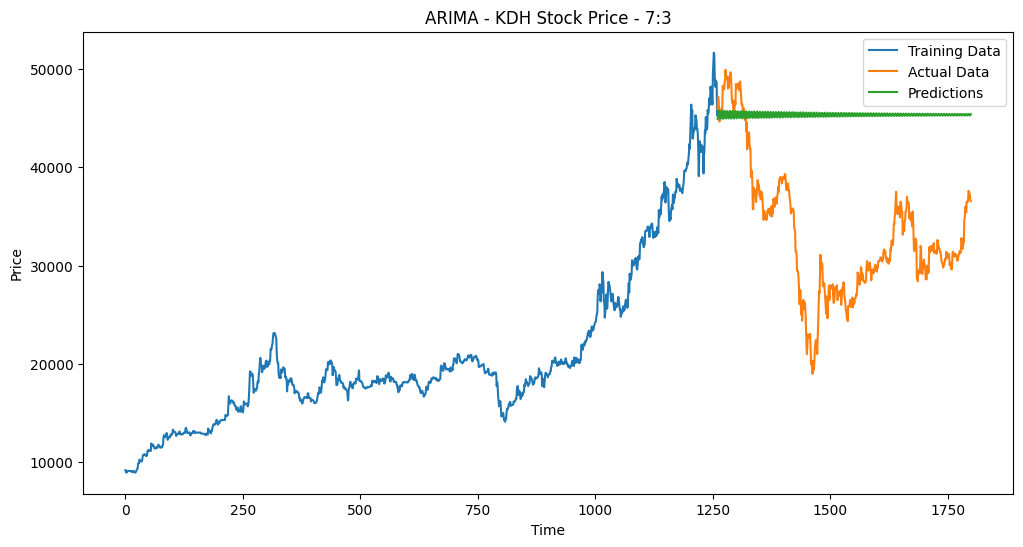

In [63]:
# Trực quan hóa kết quả 
plt.figure(figsize=(12, 6))
plt.plot(train_data_price_73, label='Training Data')
plt.plot(test_data_price_73.index, test_data_price_73, label='Actual Data')
plt.plot(test_data_price_73.index, predictions_73, label='Predictions')
plt.title('ARIMA - KDH Stock Price - 7:3')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [64]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
# Tính toán MAPE
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [65]:

# Tính toán RMSE
rmse = np.sqrt(mean_squared_error(test_data_price_73, predictions_73))

# Tính toán MAE
mae = mean_absolute_error(test_data_price_73, predictions_73)

mape = mean_absolute_percentage_error(test_data_price_73, predictions_73)

print("RMSE:", rmse)
print("MAE:", mae)
print("MAPE:", mape)


RMSE: 13875.15824858153
MAE: 12586.52990181376
MAPE: 42.896199083429224


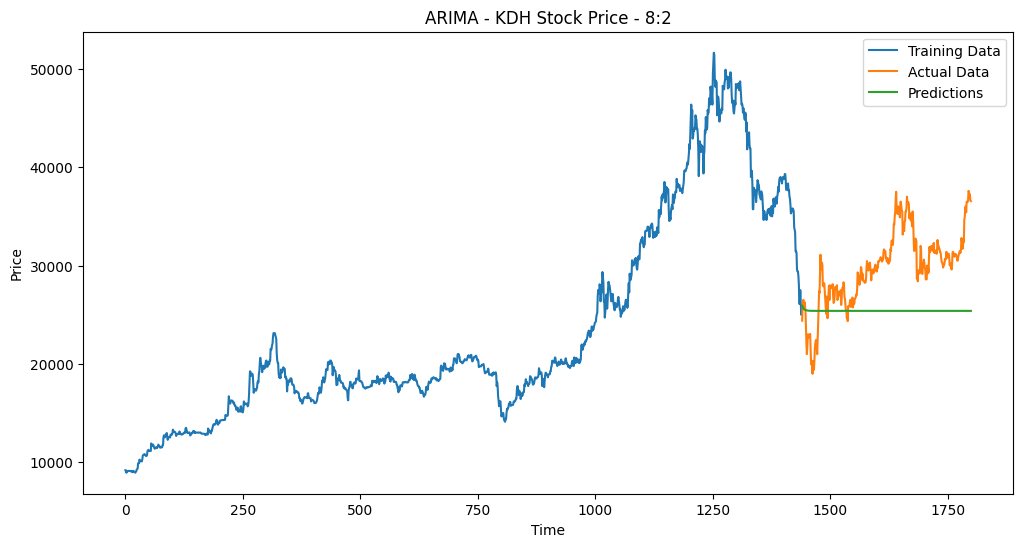

In [66]:
# Trực quan hóa kết quả 
plt.figure(figsize=(12, 6))
plt.plot(train_data_price_82, label='Training Data')
plt.plot(test_data_price_82.index, test_data_price_82, label='Actual Data')
plt.plot(test_data_price_82.index, predictions_82, label='Predictions')
plt.title('ARIMA - KDH Stock Price - 8:2')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [67]:
# Tính toán RMSE
rmse = np.sqrt(mean_squared_error(test_data_price_82, predictions_82))

# Tính toán MAE
mae = mean_absolute_error(test_data_price_82, predictions_82)

mape = mean_absolute_percentage_error(test_data_price_82, predictions_82)

print("RMSE:", rmse)
print("MAE:", mae)
print("MAPE:", mape)


RMSE: 5748.252570055239
MAE: 4940.229242498287
MAPE: 15.903227179057497


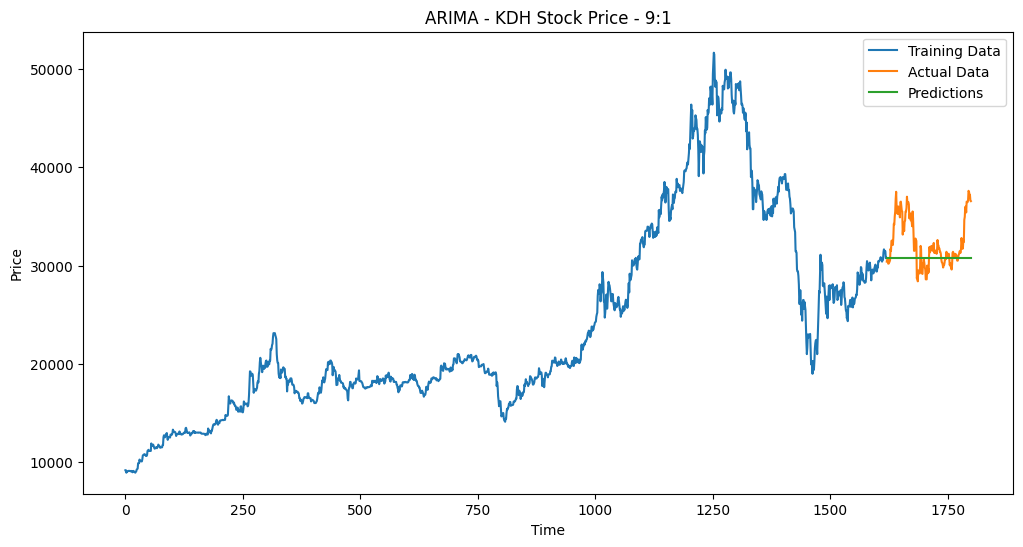

In [68]:
# Trực quan hóa kết quả 
plt.figure(figsize=(12, 6))
plt.plot(train_data_price_91, label='Training Data')
plt.plot(test_data_price_91.index, test_data_price_91, label='Actual Data')
plt.plot(test_data_price_91.index, predictions_91, label='Predictions')
plt.title('ARIMA - KDH Stock Price - 9:1')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [69]:
# Tính toán RMSE
rmse = np.sqrt(mean_squared_error(test_data_price_91, predictions_91))

# Tính toán MAE
mae = mean_absolute_error(test_data_price_91, predictions_91)

mape = mean_absolute_percentage_error(test_data_price_91, predictions_91)

print("RMSE:", rmse)
print("MAE:", mae)
print("MAPE:", mape)


RMSE: 2904.0823756299415
MAE: 2127.222222222222
MAPE: 6.212005547068467
